# Statistical Analysis

## Inet 4061: Fundamentals of Data Science

### Author: Quentin Smith

First attempt at using Python Notebooks. We will go over basic libraries and statistical analysis. 

In [23]:
# magic function that renders figures in a notebook (instead of displaying a dump of the figure object)
%matplotlib inline

# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy as np
print('numpy: {}'.format(np.__version__))
# matplotlib
import matplotlib 
import matplotlib.pyplot as plt
print('matplotlib: {}'.format(matplotlib.__version__))
# seaborn
import seaborn as sns
print('seaborn: {}'.format(sns.__version__))
# pandas
import pandas as pd
print('pandas: {}'.format(pd.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

# statsmodels
import statsmodels.stats.api as sms

#scipy
import scipy.stats as stats
scipy.stats.binom
print('scipy.stats.binom: {}'.format(scipy.__version__))

Python: 3.7.10 (default, Feb 20 2021, 21:17:23) 
[GCC 7.5.0]
scipy: 1.4.1
numpy: 1.19.5
matplotlib: 3.2.2
seaborn: 0.11.1
pandas: 1.1.5
sklearn: 0.22.2.post1
scipy.stats.binom: 1.4.1


In [24]:
# Find type
a = 5
type(a)

int

In [25]:
import scipy.stats as stats
stats.binom

## Exercise: Distributions and Descriptive Statistics

### Data:
Create binomial and normal distributions.

### Binomial Distribution:
- n = number of repeated trials
- p = probability of success (note, same value per each trial)
- k = define all the possible values each trial can take

In [4]:
# binomial distribution of 20 trials
n = 20
p = 0.3
# array of all possible outcomes (0 to 20 successful values)
k = np.arange(0,21)
binomial = stats.binom.pmf(k, n, p)
binomial

array([7.97922663e-04, 6.83933711e-03, 2.78458725e-02, 7.16036722e-02,
       1.30420974e-01, 1.78863051e-01, 1.91638983e-01, 1.64261985e-01,
       1.14396740e-01, 6.53695655e-02, 3.08170809e-02, 1.20066549e-02,
       3.85928193e-03, 1.01783260e-03, 2.18106985e-04, 3.73897689e-05,
       5.00755833e-06, 5.04963865e-07, 3.60688475e-08, 1.62716605e-09,
       3.48678440e-11])

### Normal distribution: 
 - mu = mean of the distribution
 - sigma = standard deviation

In [5]:
mu = 0
sigma = 1
x_norm = np.arange(-5, 5, 0.1)
y_norm = stats.norm.pdf(x_norm, 0, 1)
print('mu = %.2f' % mu) 
print('sigma = %.2f' % sigma)

mu = 0.00
sigma = 1.00


## Exploratory Data Analysis

### Binomial distribution

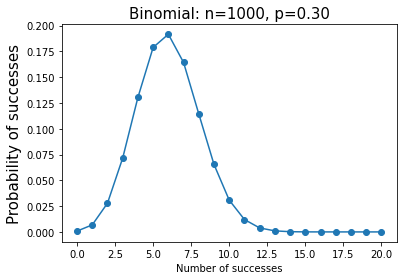

In [26]:
plt.plot(k, binomial, 'o-')
plt.title('Binomial: n=%i, p=%.2f' % (n,p), fontsize=15)
plt.xlabel('Number of successes')
plt.ylabel('Probability of successes', fontsize=15)
plt.show()

### Normal distribution

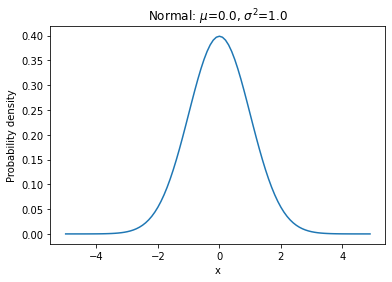

In [7]:
plt.plot(x_norm, y_norm)
plt.title('Normal: $\mu$=%.1f, $\sigma^2$=%.1f' % (mu, sigma))
plt.xlabel('x')
plt.ylabel('Probability density')
plt.show()

## Exercise: Distributions and Descriptive Statistics

### Data
Simulate binomial and normal distributions.

### Statistical Estimation: Binomial simulation
- Simulate a binomial random variable
- Plot the histogram
- Output mean and standard deviation

In [28]:
# binomial simulation of 10000 binomial random variables
# use the random_state parameter to seed an internal RandomState object
#     ensures that the random number generation is reproducible across runs
binom_sim = stats.binom.rvs(n = 20, p = 0.6, size = 10000, random_state=1234)

### Exploratory Data Analysis

Binomial simulation - histogram of successes for 20 trials
Mean: 11.9996
SD:   2.19287


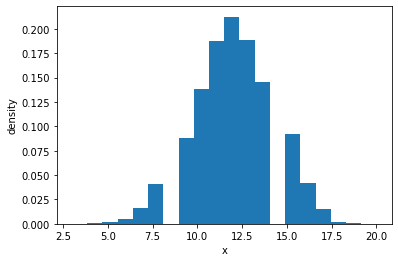

In [9]:
print ( "Binomial simulation - histogram of successes for 20 trials")
print ( "Mean: %g" % np.mean(binom_sim))
print ( "SD:   %g" % np.std(binom_sim, ddof = 1))

plt.hist(binom_sim, bins = 20, density = True)
plt.xlabel("x")
plt.ylabel("density")
plt.show()

### Statistical Estimation: Normal simulation
- Simulate a normal random variable
- Plot the histogram
- Output mean and standard deviation
- Plot confidence interval



- Calculate a 95% confidence interval, assuming a normal distribution
- Sigma is the estimated standard deviation of the sample mean

- confidence interval = mean +/- z*sigma
where
  - z is the standard score
  - sigma is the estimated standard deviation of the sample mean

- sigma = s / sqrt(n)
where
  - s is the standard deviation of the sample data
  - n is the sample size

References
- https://www.graphpad.com/guides/prism/7/statistics/stat_more_about_confidence_interval.htm?toc=0
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html#scipy.stats.norm
- https://stackoverflow.com/questions/15033511/compute-a-confidence-interval-from-sample-data
- https://stackoverflow.com/questions/49769546/confidence-interval-of-normal-distribution-samples

#### Output:
- The sample mean
- Sample standard deviation 
- Plot the histogram and confidence intervals of the sample Plot the normal distribution curve

pop var   1.0
pop std dev  1.0
(-1.9102254777436034, 1.8711463884489823)


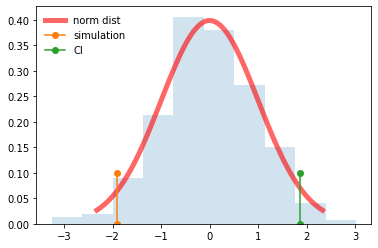

In [10]:
from scipy.stats import norm

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html#scipy.stats.norm

# generate random numbers
n = 1000
r = norm.rvs(size=n)
# print( r[0:5] )
# print('len(r)  ', len(r) )

# generate percent point function  (inverse of cdf - Cumulative distribution function)
# https://en.wikipedia.org/wiki/Quantile_function
# ppf is the value of the random variable such that the probability of the variable being 
#      less than or equal to that value equals the given probability
mean, var, skew, kurt = norm.stats(moments='mvsk')
x = np.linspace(norm.ppf(0.01),norm.ppf(0.99), 100)
# print('mean  ', mean)
print('pop var  ', var)
print('pop std dev ', var * var)

# calculate confidence interval for alpha = .05 (alpha is called significance level)
#     estimates 95% of the population falls within ±2 std deviations
# assumes the sample (array r) was drawn independently from a normal distribution 
#      with unknown standard deviation
# https://stackoverflow.com/questions/15033511/compute-a-confidence-interval-from-sample-data
#
ci = stats.t.interval(0.95, len(r)-1, loc=np.mean(r), scale=np.std(r))
print (ci)

# Create a figure and a set of subplots
fig, ax = plt.subplots(1, 1)
ax.plot(x, norm.pdf(x),'r-', lw=5, alpha=0.6, label='norm pdf')

ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)

# https://stackoverflow.com/questions/49769546/confidence-interval-of-normal-distribution-samples
# confidence interval left line
one_x12, one_y12 =  [ci[0],ci[0]], [0, 0.1]
# confidence interval right line
two_x12, two_y12 = [ci[1],ci[1]], [0, 0.1]
ax.plot(one_x12, one_y12, two_x12, two_y12, marker = 'o')

ax.legend(loc='upper left',  labels=['norm dist','simulation', 'CI'], frameon=False)
plt.show()

## Correlation:
- Calculate pairwise correlations for auto-mpg 

### Dataset:
- Pearson
- Spearman
- Kendall

Data Source:

https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data

Reference

https://www.datascience.com/learn-data-science/fundamentals/introduction-to-correlation-python-data-science


In [29]:
# Data 
path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'

mpg_data = pd.read_csv(path, delim_whitespace=True, header=None,
            names = ['mpg', 'cylinders', 'displacement','horsepower',
            'weight', 'acceleration', 'model_year', 'origin', 'name'],
            na_values='?')
mpg_data.head(20)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
5,15.0,8,429.0,198.0,4341.0,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220.0,4354.0,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215.0,4312.0,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225.0,4425.0,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190.0,3850.0,8.5,70,1,amc ambassador dpl


## Exploratory Data Analysis

In [12]:
# Pearson correlation matrix
mpg_data.drop(['model_year', 'origin'], axis=1).corr(method='pearson')

,mpg,cylinders,displacement,horsepower,weight,acceleration
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000


In [13]:
# Spearman correlation matrix
mpg_data.drop(['model_year', 'origin'], axis=1).corr(method='spearman')

,mpg,cylinders,displacement,horsepower,weight,acceleration
mpg,1.000000,-0.821864,-0.855692,-0.853616,-0.874947,0.438677
cylinders,-0.821864,1.000000,0.911876,0.816188,0.873314,-0.474189
displacement,-0.855692,0.911876,1.000000,0.876171,0.945986,-0.496512
horsepower,-0.853616,0.816188,0.876171,1.000000,0.878819,-0.658142
weight,-0.874947,0.873314,0.945986,0.878819,1.000000,-0.404550
acceleration,0.438677,-0.474189,-0.496512,-0.658142,-0.404550,1.000000


In [14]:
# Kendall correlation matrix
mpg_data.drop(['model_year', 'origin'], axis=1).corr(method='kendall')

,mpg,cylinders,displacement,horsepower,weight,acceleration
mpg,1.000000,-0.686477,-0.679847,-0.679166,-0.694006,0.301096
cylinders,-0.686477,1.000000,0.794854,0.686146,0.735481,-0.367194
displacement,-0.679847,0.794854,1.000000,0.718471,0.800508,-0.352110
horsepower,-0.679166,0.686146,0.718471,1.000000,0.703730,-0.488239
weight,-0.694006,0.735481,0.800508,0.703730,1.000000,-0.268619
acceleration,0.301096,-0.367194,-0.352110,-0.488239,-0.268619,1.000000


The different values in the correlation matrices indicate the variation in correlation caused by non-monotonic, non-linear, and non-symmetric data.

## Exercise: Contingency Table
Simulate binomial and normal distributions.

### Data

Data Source:

https://github.com/ipython-books/cookbook-2nd-data/blob/master/federer.csv

Reference:

https://ipython-books.github.io/74-estimating-the-correlation-between-two-variables-with-a-contingency-table-and-a-chi-squared-test/

In [15]:
player = 'Roger Federer'
df = pd.read_csv('https://github.com/ipython-books/'
                 'cookbook-2nd-data/blob/master/'
                 'federer.csv?raw=true',
                 parse_dates=['start date'],
                 dayfirst=True)
print(f"Number of columns: {len(df.columns)}")
df[df.columns[:4]].tail()

Number of columns: 70


,year,tournament,start date,type
1174,2012,"Australian Open, Australia",2012-01-16,GS
1175,2012,"Doha, Qatar",2012-01-02,250
1176,2012,"Doha, Qatar",2012-01-02,250
1177,2012,"Doha, Qatar",2012-01-02,250
1178,2012,"Doha, Qatar",2012-01-02,250


In [16]:
npoints = df['player1 total points total']
points = df['player1 total points won'] / npoints
aces = df['player1 aces'] / npoints

df_bis = pd.DataFrame({'points': points,
                       'aces': aces}).dropna()
df_bis['result'] = (df_bis['points'] >
                    df_bis['points'].median())
df_bis['manyaces'] = (df_bis['aces'] >
                      df_bis['aces'].median())

pd.crosstab(df_bis['result'], df_bis['manyaces'])

manyaces,False,True
result,,
False,300,214
True,214,299


The frequency of the percent of points won is higher (above the median) when the percent of aces is higher (above the median). In this example, there is about a 299/(299 + 214) = 0.582846 chance of above average number of points won when there are an above average number of aces.

## Conclusions
This notebook demonstrates example Python code to implement:

- discrete (binomial) and continuous (normal) probability distributions and sample simulations
- pairwise correlation matrices
- contingency tables